<a href="https://colab.research.google.com/github/Pathway2008/Weblog/blob/main/5model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Weblog/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Weblog/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Weblog/sample_submission.csv')

In [31]:
train.drop(['sessionID','userID'],axis=1,inplace=True)
test.drop(['sessionID','userID'],axis=1,inplace=True)

In [ ]:
'''
sessionID : 세션 ID

userID : 사용자 ID

TARGET : 세션에서 발생한 총 조회수

browser : 사용된 브라우저

OS : 사용된 기기의 운영체제

device : 사용된 기기

new : 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)

quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100) ***

duration : 총 세션 시간 (단위: 초) ***

bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)

transaction : 세션 내에서 발생의 거래의 수

transaction_revenue : 총 거래 수익

continent : 세션이 발생한 대륙

subcontinent : 세션이 발생한 하위 대륙

country : 세션이 발생한 국가

traffic_source : 트래픽이 발생한 소스

traffic_medium : 트래픽 소스의 매체

keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정

referral_path : traffic_medium이 referral인 경우 설정되는 경로
'''

In [1]:
import warnings
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


#number

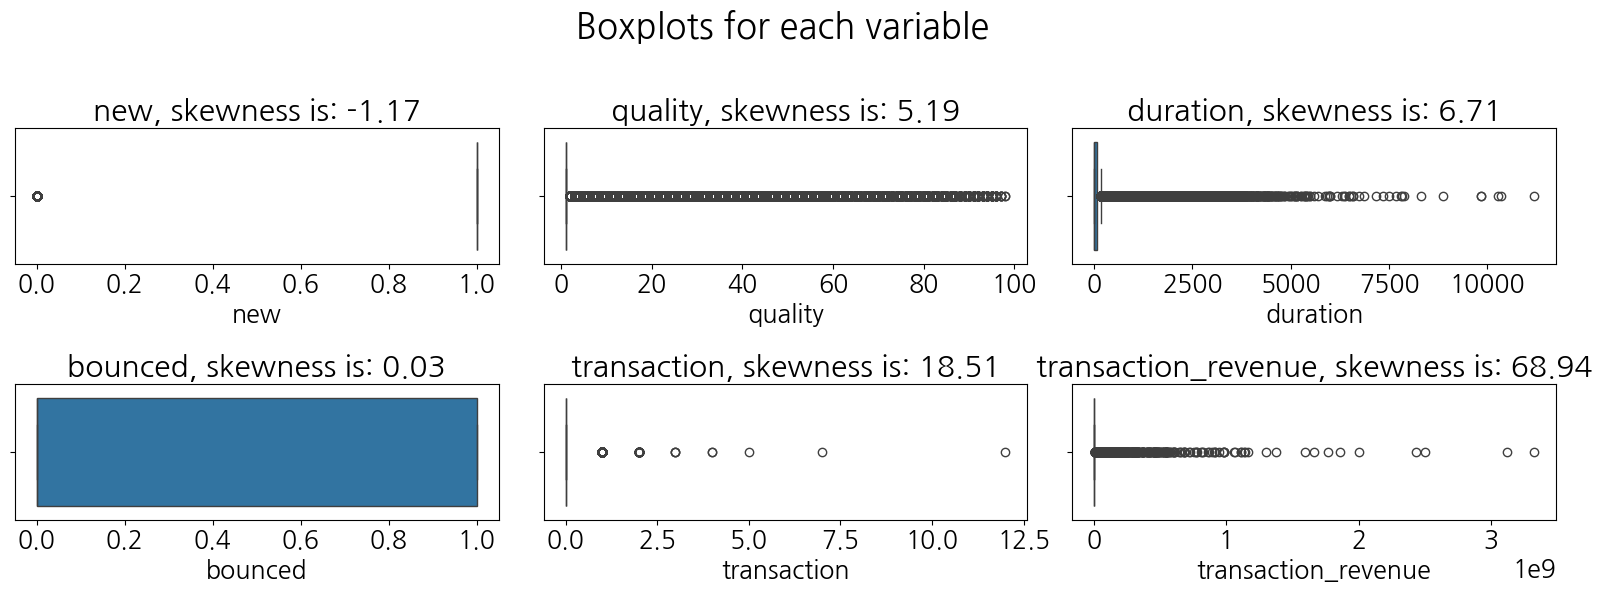

In [10]:
numeric_columns = train.drop(columns=['TARGET']).select_dtypes(include='number')

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=train, columns_list=numeric_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

#object

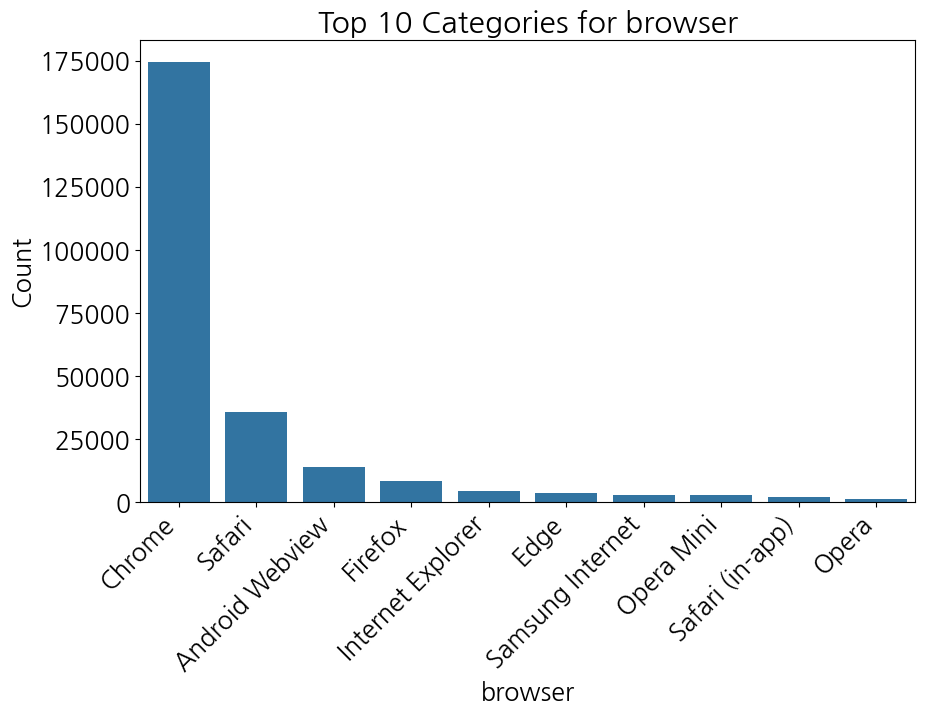

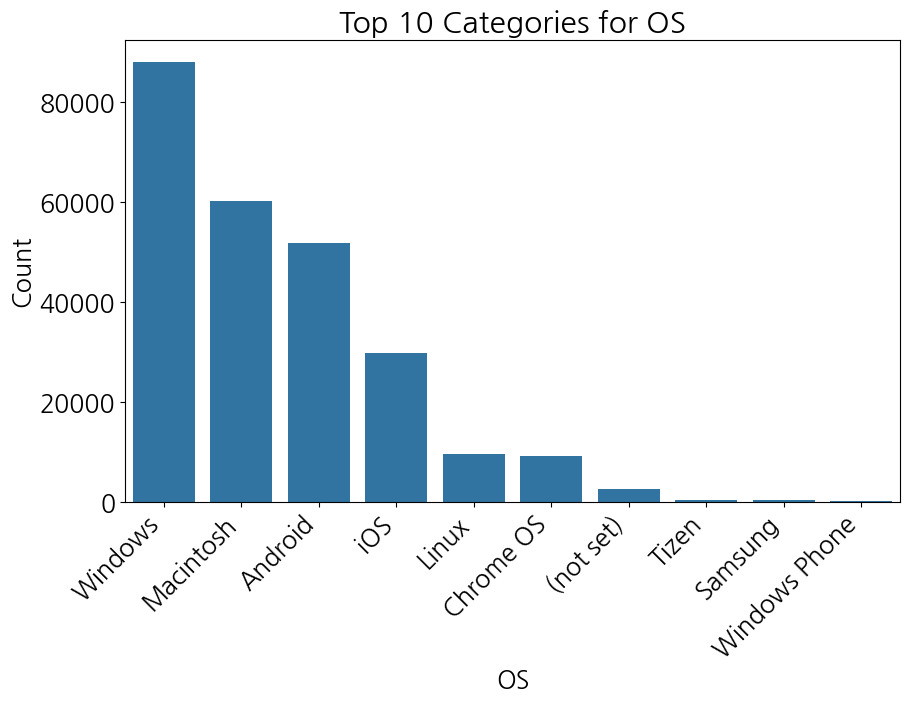

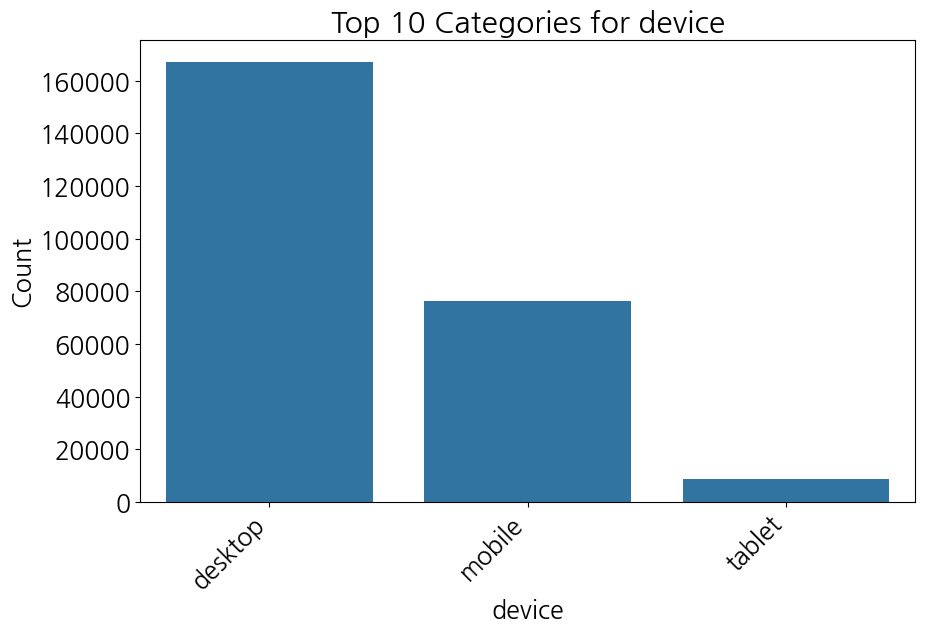

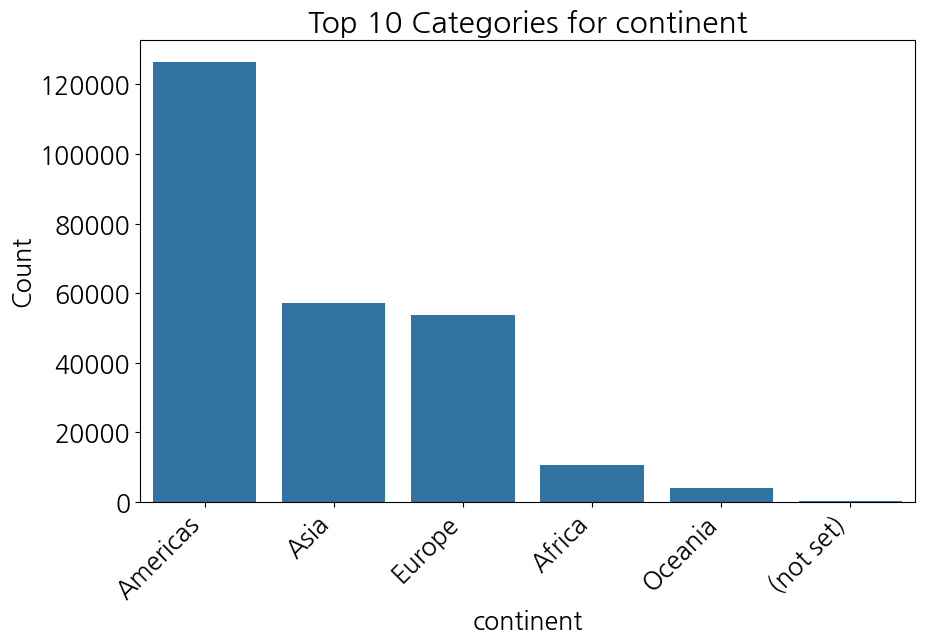

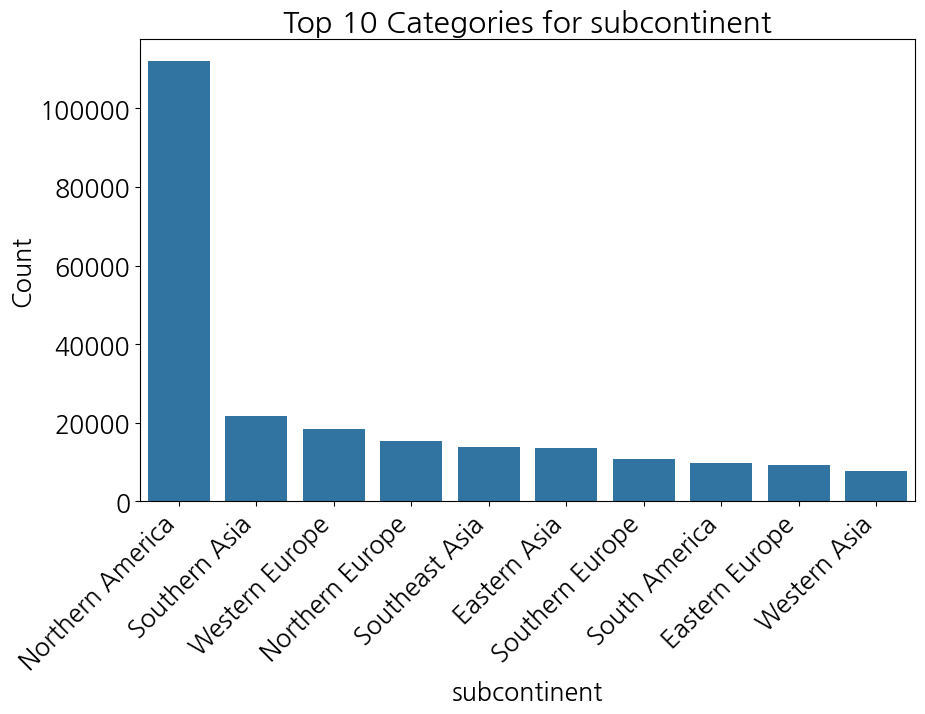

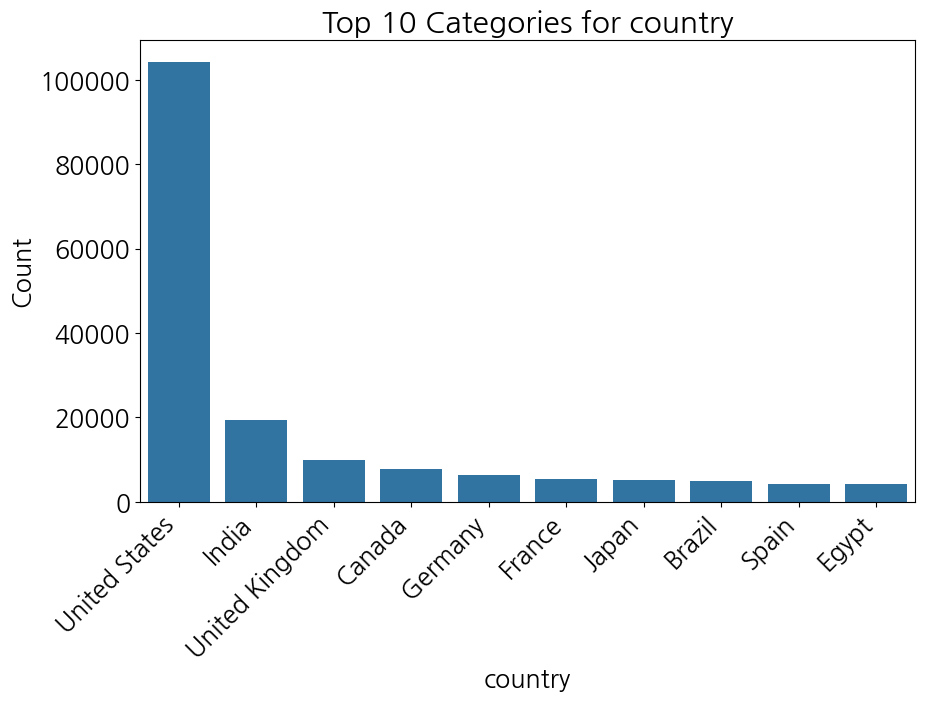

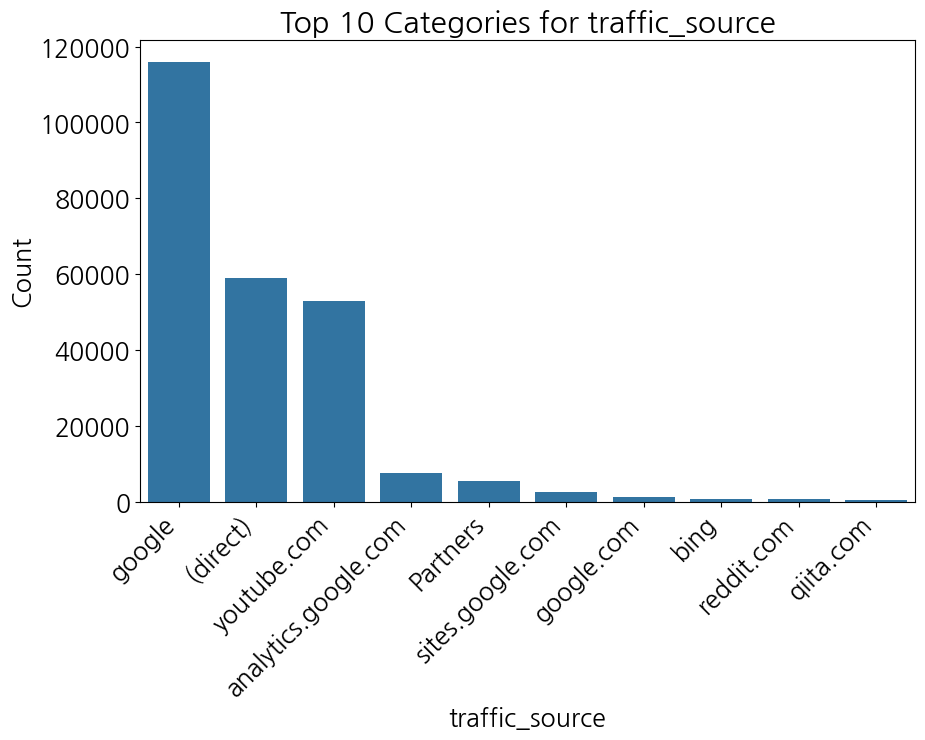

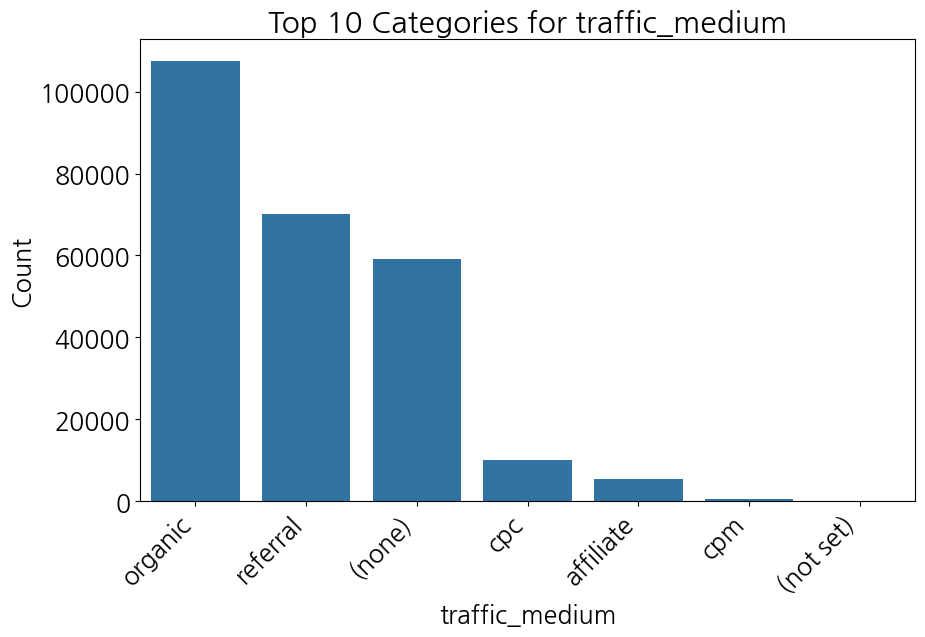

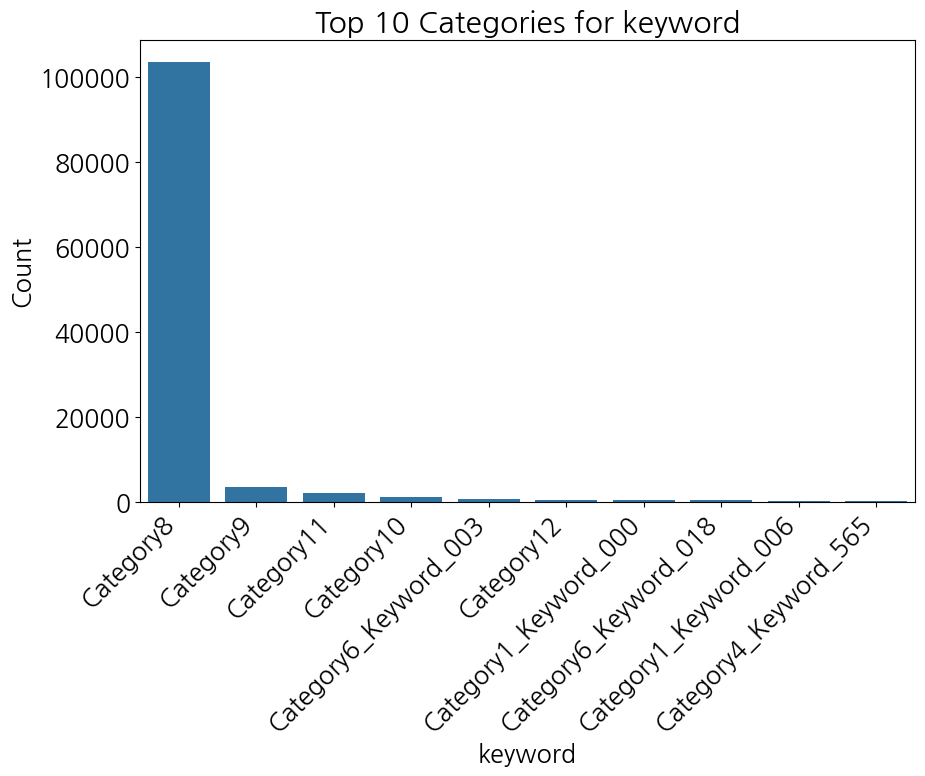

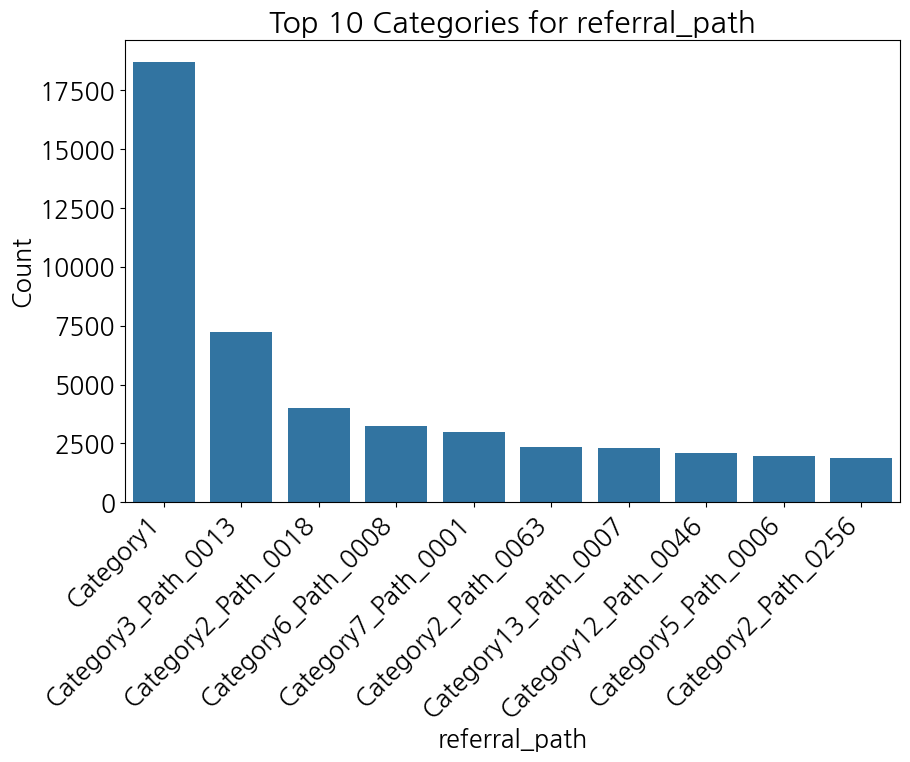

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
object_columns = train.drop(columns=['TARGET']).select_dtypes(include='object')

for column in object_columns.columns:
    top_categories = train[column].value_counts().nlargest(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.title(f'Top 10 Categories for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
object_columns = train.drop(columns=['TARGET']).select_dtypes(include='object')
for feature in object_columns.columns:
    le = LabelEncoder()

    # Convert the column to string type
    train[feature] = train[feature].astype(str)
    le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    # Make sure the test set has the same data type
    test[feature] = test[feature].astype(str)

    # Handle unseen labels in the test set
    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)

    test[feature] = le.transform(test[feature])

In [16]:
train.corr()

,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
TARGET,1.000000,-0.055622,-0.035326,-0.063165,-0.066609,0.632723,0.595340,-0.464659,0.322097,0.180687,-0.098807,-0.062109,0.096830,-0.129965,-0.106966,0.008764,-0.034907
browser,-0.055622,1.000000,0.265923,0.330525,0.070133,-0.068934,-0.035132,0.093663,-0.029384,-0.016699,0.062693,-0.009102,0.017471,-0.014335,0.041495,-0.042856,0.134731
OS,-0.035326,0.265923,1.000000,-0.222283,0.063082,-0.067824,0.000117,0.082776,-0.027455,-0.014267,0.173029,-0.046174,-0.004497,-0.032296,0.113733,0.020812,0.121976
device,-0.063165,0.330525,-0.222283,1.000000,0.087240,-0.119814,-0.056872,0.047635,-0.045819,-0.025110,-0.066796,0.048938,-0.071572,0.123085,0.093978,-0.094787,0.124123
new,-0.066609,0.070133,0.063082,0.087240,1.000000,-0.182483,-0.087505,0.053208,-0.072169,-0.042463,0.087580,0.054682,-0.119143,0.194487,0.186005,0.046299,0.083021
quality,0.632723,-0.068934,-0.067824,-0.119814,-0.182483,1.000000,0.459374,-0.249452,0.475446,0.246404,-0.157183,-0.071616,0.158191,-0.154717,-0.208724,0.010092,-0.133682
duration,0.595340,-0.035132,0.000117,-0.056872,-0.087505,0.459374,1.000000,-0.337534,0.211381,0.123186,-0.028639,-0.025778,0.034821,-0.112517,-0.073652,0.007239,0.009239
bounced,-0.464659,0.093663,0.082776,0.047635,0.053208,-0.249452,-0.337534,1.000000,-0.088368,-0.042052,0.165469,0.052410,-0.110942,0.106521,0.101185,-0.028731,0.078308
transaction,0.322097,-0.029384,-0.027455,-0.045819,-0.072169,0.475446,0.211381,-0.088368,1.000000,0.462039,-0.061634,-0.026710,0.065931,-0.061975,-0.085410,0.003769,-0.055176
transaction_revenue,0.180687,-0.016699,-0.014267,-0.025110,-0.042463,0.246404,0.123186,-0.042052,0.462039,1.000000,-0.029369,-0.012963,0.032713,-0.028944,-0.037874,-0.001519,-0.029761


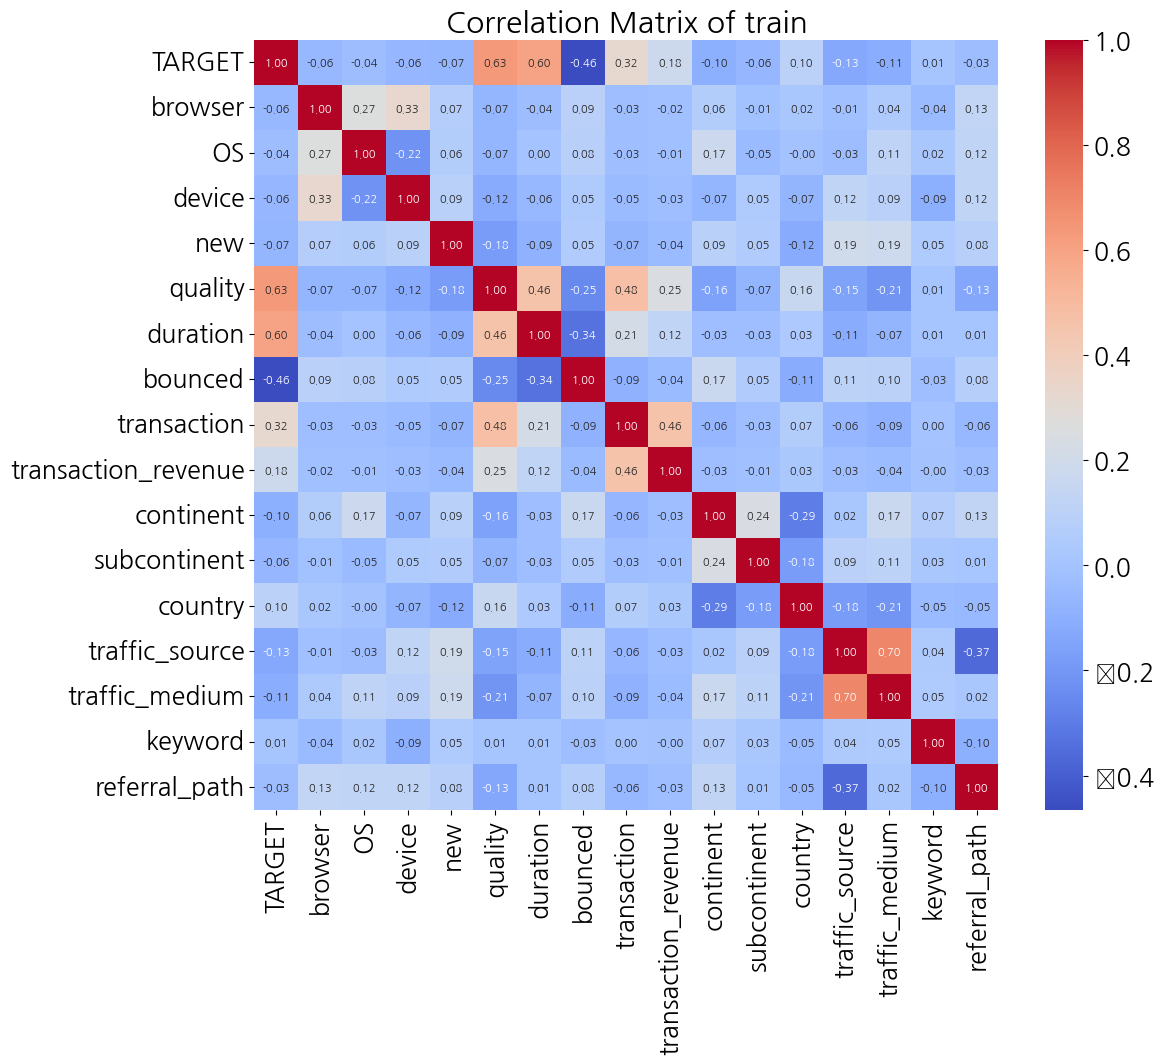

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
correlation_matrix = train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn with smaller font size for correlation coefficients
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 8})  # Adjust the font size here

# Set the title of the plot
plt.title('Correlation Matrix of train')

# Show the plot
plt.show()

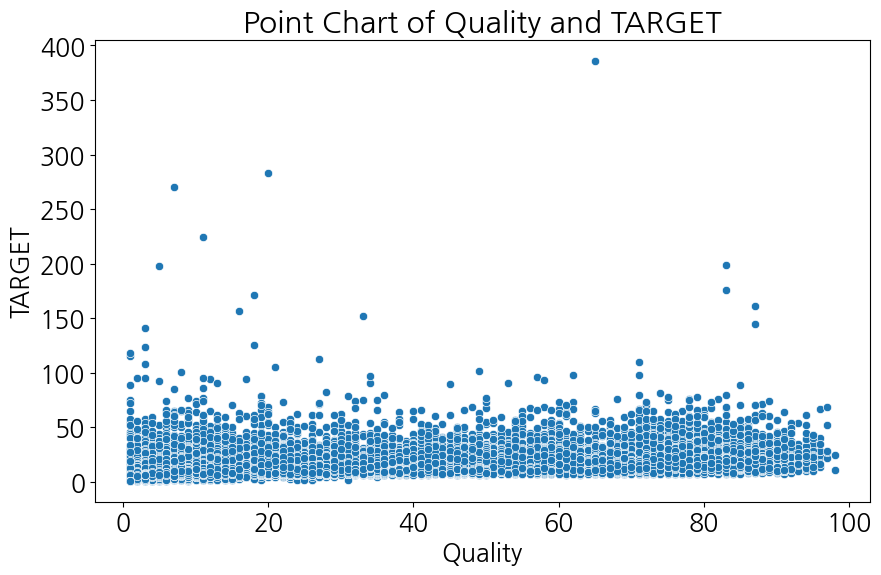

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality', y='TARGET', data=train)
plt.title('Point Chart of Quality and TARGET')
plt.xlabel('Quality')
plt.ylabel('TARGET')
plt.show()

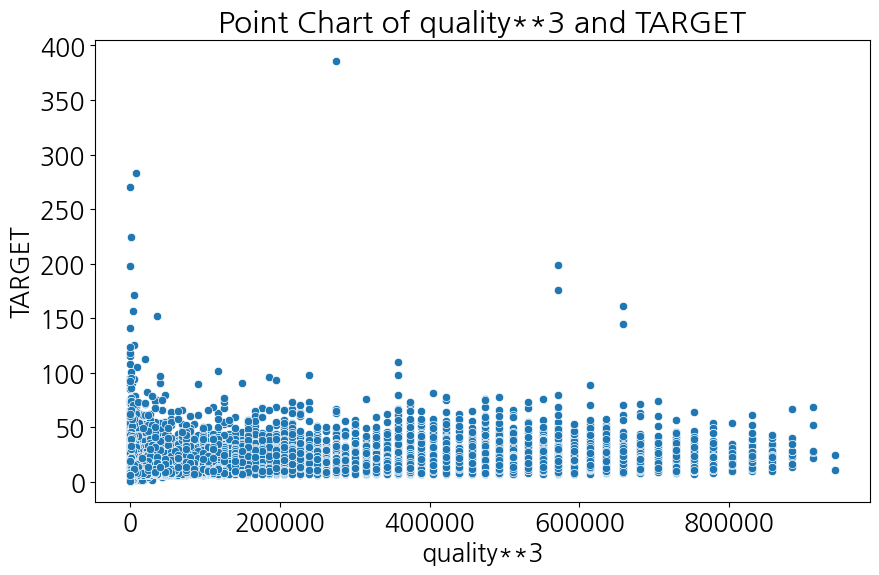

In [27]:
train['quality**3'] = train['quality']**3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality**3', y='TARGET', data=train)
plt.title('Point Chart of quality**3 and TARGET')
plt.xlabel('quality**3')
plt.ylabel('TARGET')
plt.show()

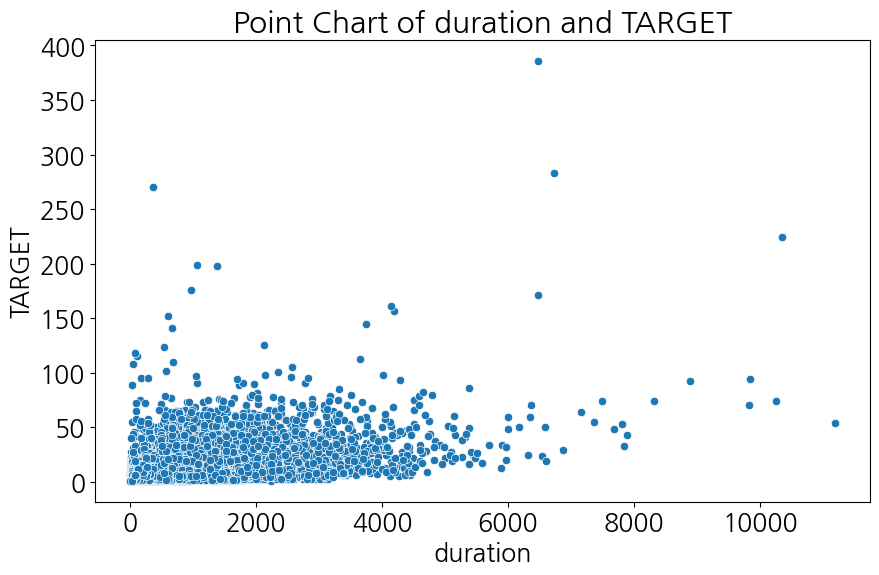

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='TARGET', data=train)
plt.title('Point Chart of duration and TARGET')
plt.xlabel('duration')
plt.ylabel('TARGET')
plt.show()

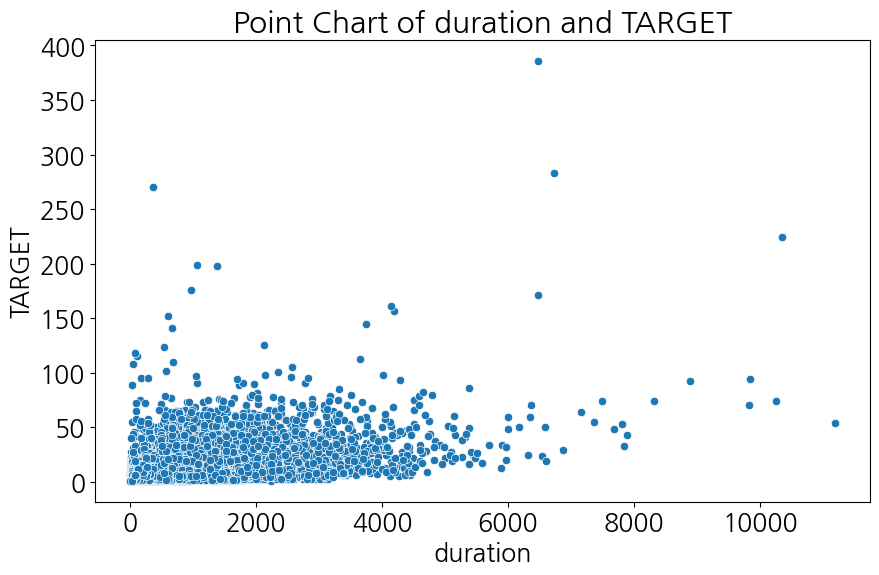

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'train' is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='TARGET', data=train)
plt.title('Point Chart of duration and TARGET')
plt.xlabel('duration')
plt.ylabel('TARGET')
plt.show()

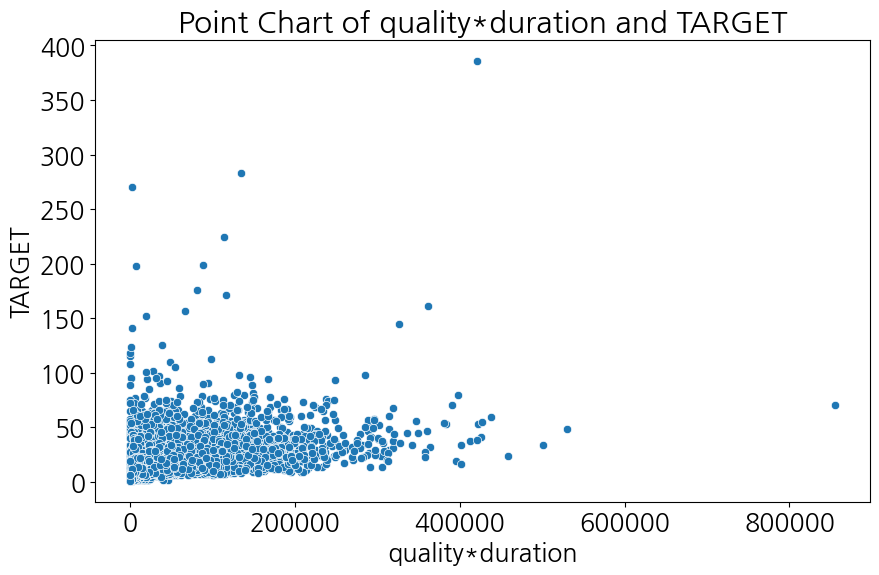

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
train['quality*duration'] = train['quality']*train['duration']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality*duration', y='TARGET', data=train)
plt.title('Point Chart of quality*duration and TARGET')
plt.xlabel('quality*duration')
plt.ylabel('TARGET')
plt.show()

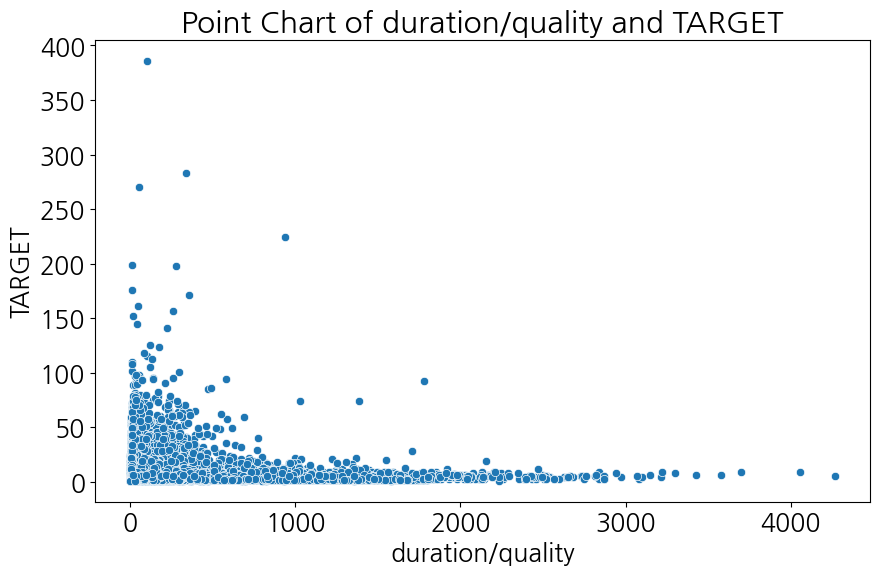

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
train['duration/quality'] = train['duration'] / train['quality']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration/quality', y='TARGET', data=train)
plt.title('Point Chart of duration/quality and TARGET')
plt.xlabel('duration/quality')
plt.ylabel('TARGET')
plt.show()

In [1]:
!pip install autogluon

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               252289 non-null  float64
 1   browser              252289 non-null  int64  
 2   OS                   252289 non-null  int64  
 3   device               252289 non-null  int64  
 4   new                  252289 non-null  int64  
 5   quality              252289 non-null  float64
 6   duration             252289 non-null  float64
 7   bounced              252289 non-null  int64  
 8   transaction          252289 non-null  float64
 9   transaction_revenue  252289 non-null  float64
 10  continent            252289 non-null  int64  
 11  subcontinent         252289 non-null  int64  
 12  country              252289 non-null  int64  
 13  traffic_source       252289 non-null  int64  
 14  traffic_medium       252289 non-null  int64  
 15  keyword          

In [5]:
fit_parameters = {
    'presets': 'best_quality',
    'num_bag_folds': 7,  ### 값을 키울수록 점수가 좋아지나, 너무 키우면 검증세트 크기가 작아져 잘못된 결과를 얻게 됨
    'num_bag_sets': 5,  ### 값을 키울수록 점수가 좋아짐, 속도가 느려짐.
    'num_stack_levels': 1

} #auto_stack = True, fit_weighted_ensemble = True,

In [7]:
from autogluon.tabular import TabularDataset, TabularPredictor
train = TabularDataset(train)
test = TabularDataset(test)

In [14]:
predictor = TabularPredictor(label='TARGET', eval_metric='root_mean_squared_error',sample_weight='balance_weight',problem_type ='regression' )
predictor.fit(train, auto_stack = True, fit_weighted_ensemble = True,presets=fit_parameters, num_gpus=1,hyperparameter_tune_kwargs='auto',
              excluded_model_types=['FASTAI','NN_TORCH','KNN'])

No path specified. Models will be saved in: "AutogluonModels/ag-20240214_111644"
Presets specified: [{'auto_stack': True, 'fit_weighted_ensemble': True}]
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Using predefined sample weighting strategy: balance_weight. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240214_111644"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          12
Memory Avail:       8

  0%|          | 0/1 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.21%)
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-2.7153	 = Validation score   (-root_mean_squared_error)
	66.89s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ...


  0%|          | 0/1 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.22%)
Fitted model: LightGBM_BAG_L1/T1 ...
	-2.7329	 = Validation score   (-root_mean_squared_error)
	14.37s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ...
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L1 ...
	-2.8479	 = Validation score   (-root_mean_squared_error)
	29.76s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ...


  0%|          | 0/1 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2.0 workers, per: cpus=6, gpus=0, memory=0.22%)
Fitted model: CatBoost_BAG_L1/T1 ...
	-2.7007	 = Validation score   (-root_mean_squared_error)
	81.36s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ...
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-2.7803	 = Validation score   (-root_mean_squared_error)
	18.71s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ...


  0%|          | 0/1 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2.0 workers, per: cpus=6, gpus=0, memory=0.29%)
Fitted model: XGBoost_BAG_L1/T1 ...
	-2.7173	 = Validation score   (-root_mean_squared_error)
	20.61s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.23%)
	-2.7617	 = Validation score   (-root_mean_squared_error)
	13.34s	 = Training   runtime
	2.08s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost_BAG_L1/T1': 0.291, 'LightGBMXT_BAG_L1/T1': 0.244, 'XGBoost_BAG_L1/T1': 0.198, 'ExtraTreesMSE_BAG_L1': 0.163, 'RandomForestMSE_BAG_L1': 0.105}
	-2.6584	 = Validation score   (-root_mean_squared_error)
	2.45s	 = Training   runtime
	0.0s	 = Validation runtime
Excluded models: ['KNN', 'FASTAI', 'NN_TORCH'] (Specified by `excluded_model_types`)
Fitting 7 L2

  0%|          | 0/1 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.27%)
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-2.6946	 = Validation score   (-root_mean_squared_error)
	69.9s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ...


  0%|          | 0/1 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.27%)
Fitted model: LightGBM_BAG_L2/T1 ...
	-2.6875	 = Validation score   (-root_mean_squared_error)
	13.28s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ...
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L2 ...
	-2.6855	 = Validation score   (-root_mean_squared_error)
	107.81s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ...


  0%|          | 0/1 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2.0 workers, per: cpus=6, gpus=0, memory=0.27%)
Fitted model: CatBoost_BAG_L2/T1 ...
	-2.6589	 = Validation score   (-root_mean_squared_error)
	29.53s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ...
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	-2.6582	 = Validation score   (-root_mean_squared_error)
	26.33s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ...


  0%|          | 0/1 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2.0 workers, per: cpus=6, gpus=0, memory=0.36%)
Fitted model: XGBoost_BAG_L2/T1 ...
	-2.6785	 = Validation score   (-root_mean_squared_error)
	16.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.29%)
	-2.7201	 = Validation score   (-root_mean_squared_error)
	9.7s	 = Training   runtime
	1.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ...
	Ensemble Weights: {'RandomForestMSE_BAG_L2': 0.244, 'ExtraTreesMSE_BAG_L2': 0.244, 'CatBoost_BAG_L2/T1': 0.195, 'CatBoost_BAG_L1/T1': 0.122, 'XGBoost_BAG_L1/T1': 0.073, 'LightGBMXT_BAG_L1/T1': 0.049, 'LightGBMXT_BAG_L2/T1': 0.037, 'XGBoost_BAG_L2/T1': 0.024, 'ExtraTreesMSE_BAG_L1': 0.012}
	-2.6264	 = Validation score   (-root_mean_squared_error)
	3.5s	 = Training   runtime
	0.0s	 = 

In [15]:
predictor.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-2.626386,root_mean_squared_error,2.100439,498.611339,0.003981,3.504246,3,True,16
1,ExtraTreesMSE_BAG_L2,-2.658178,root_mean_squared_error,2.092057,271.375955,0.000818,26.328013,2,True,13
2,WeightedEnsemble_L2,-2.658351,root_mean_squared_error,0.008960,219.777623,0.003441,2.445492,2,True,8
3,CatBoost_BAG_L2/T1,-2.658858,root_mean_squared_error,2.092453,274.578965,0.001214,29.531023,2,True,12
4,XGBoost_BAG_L2/T1,-2.678505,root_mean_squared_error,2.092258,261.538795,0.001019,16.490853,2,True,14
5,RandomForestMSE_BAG_L2,-2.685472,root_mean_squared_error,2.092160,352.857270,0.000921,107.809328,2,True,11
6,LightGBM_BAG_L2/T1,-2.687527,root_mean_squared_error,2.092447,258.324259,0.001207,13.276318,2,True,10
7,LightGBMXT_BAG_L2/T1,-2.694621,root_mean_squared_error,2.092488,314.947875,0.001249,69.899934,2,True,9
8,CatBoost_BAG_L1/T1,-2.700728,root_mean_squared_error,0.001264,81.363059,0.001264,81.363059,1,True,4
9,LightGBMXT_BAG_L1/T1,-2.715294,root_mean_squared_error,0.001326,66.887592,0.001326,66.887592,1,True,1


In [16]:
predictor.feature_importance(data=train)

Computing feature importance via permutation shuffling for 16 features using 5000 rows with 5 shuffle sets...
	411.0s	= Expected runtime (82.2s per shuffle set)
	107.54s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
quality,4.527338,0.400197,0.000007,5,5.351350,3.703326
duration,1.401607,0.335737,0.000367,5,2.092895,0.710320
subcontinent,0.498850,0.066026,0.000036,5,0.634799,0.362901
new,0.459707,0.122114,0.000545,5,0.711142,0.208272
browser,0.382825,0.509815,0.084218,5,1.432541,-0.666890
continent,0.335128,0.067163,0.000184,5,0.473417,0.196839
traffic_source,0.276265,0.041508,0.000059,5,0.361731,0.190799
device,0.219752,0.031345,0.000048,5,0.284292,0.155211
OS,0.210711,0.026441,0.000029,5,0.265152,0.156269
bounced,0.196709,0.034482,0.000109,5,0.267708,0.125711


In [ ]:
predictor.info()

In [35]:
!pip install catboost

In [36]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from math import sqrt
from sklearn.metrics import make_scorer, mean_squared_error

In [44]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [45]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [46]:
def rmse_scorer(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Random Forest
rf_model = RandomForestRegressor(random_state=43)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
rf_rmse = rmse_scorer(y_test, rf_predictions)


# Extra Trees
et_model = ExtraTreesRegressor(random_state=43)
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)
et_scores = cross_val_score(et_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
et_rmse = rmse_scorer(y_test, et_predictions)

#xgb
xgb_model = xgb.XGBRegressor(random_state=43)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
xgb_rmse = rmse_scorer(y_test, xgb_predictions)

#cat
cat_model = CatBoostRegressor(random_seed=43)
cat_model.fit(X_train, y_train)
cat_predictions = cat_model.predict(X_test)
cat_scores = cross_val_score(cat_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
cat_rmse = rmse_scorer(y_test, cat_predictions)

#lgb
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
lgb_rmse = rmse_scorer(y_test, lgb_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Learning rate set to 0.092727
0:	learn: 5.1917451	total: 7.74ms	remaining: 7.73s
1:	learn: 4.9103198	total: 14.1ms	remaining: 7.05s
2:	learn: 4.6668128	total: 20.3ms	remaining: 6.76s
3:	learn: 4.4570676	total: 26.8ms	remaining: 6.68s
4:	learn: 4.2722437	total: 33.4ms	remaining: 6.66s
5:	learn: 4.1135519	total: 40ms	remaining: 6.63s
6:	learn: 3.9740095	total: 46.7ms	remaining: 6.62s
7:	learn: 3.8483785	total: 53.3ms	remaining: 6.6s
8:	learn: 3.7409373	total: 59.6ms	remaining: 6.57s
9:	learn: 3.6450408	total: 66.6ms	remaining: 6.6s
10:	learn: 3.5592380	total: 73.4ms	remaining: 6.6s
11:	learn: 3.4839066	total: 79.7ms	remaining: 6.56s
12:	learn: 3.4226280	total: 86.1ms	remaining: 6.54s
13:	learn: 3.3659712	total: 92.9ms	remaining: 6.54s
14:	learn: 3.3141835	total: 99.5ms	remaining: 6.53s
15:	learn: 3.2728670	total: 106ms	remaining: 6.51s
16:	learn: 3.2370188	total: 112ms	remaining: 6.49s
17:	learn: 3.1953980	total: 119ms	remaining: 6.51s
18:	learn: 3.1645649	total: 126ms	remaining: 6.49s
1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10:	learn: 3.6269446	total: 67ms	remaining: 6.03s
11:	learn: 3.5501655	total: 72.7ms	remaining: 5.99s
12:	learn: 3.4864148	total: 78.9ms	remaining: 5.99s
13:	learn: 3.4276937	total: 84.7ms	remaining: 5.96s
14:	learn: 3.3716397	total: 90.6ms	remaining: 5.95s
15:	learn: 3.3286775	total: 96.4ms	remaining: 5.93s
16:	learn: 3.2879878	total: 102ms	remaining: 5.9s
17:	learn: 3.2475507	total: 108ms	remaining: 5.89s
18:	learn: 3.2181901	total: 113ms	remaining: 5.85s
19:	learn: 3.1883643	total: 119ms	remaining: 5.83s
20:	learn: 3.1608812	total: 125ms	remaining: 5.84s
21:	learn: 3.1356252	total: 131ms	remaining: 5.81s
22:	learn: 3.1116419	total: 137ms	remaining: 5.81s
23:	learn: 3.0897469	total: 143ms	remaining: 5.8s
24:	learn: 3.0719639	total: 149ms	remaining: 5.79s
25:	learn: 3.0578372	total: 154ms	remaining: 5.78s
26:	learn: 3.0461981	total: 160ms	remaining: 5.76s
27:	learn: 3.0333634	total: 165ms	remaining: 5.74s
28:	learn: 3.0231541	total: 171ms	remaining:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 16
[LightGBM] [Info] Start training from score 3.593406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 141281, number of used features: 16
[LightGBM] [Info] Start training from score 3.593491
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [40]:
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}\n')
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}\n')
print(f'XGBoost Cross-Validation RMSE: {xgb_scores.mean()}')
print(f'XGBoost test RMSE: {xgb_rmse}\n')
print(f'CatBoost Cross-Validation RMSE: {cat_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}\n')
print(f"Cross-validated LightGBM scores: {lgb_scores.mean()}")
print(f"LightGBM RMSE on test set: {lgb_rmse}")

Random Forest Cross-Validation RMSE: 3.049630821828634
RF test RMSE: 2.9790751125672807

Extra Trees Cross-Validation RMSE: 3.166330030925537
ET test RMSE: 3.1440719707107214

XGBoost Cross-Validation RMSE: 3.088954342031811
XGBoost test RMSE: 2.9320699652675972

CatBoost Cross-Validation RMSE: 2.9366083714780578
CatBoost test RMSE: 2.8738359174953314

Cross-validated LightGBM scores: 2.8775772274161375
LightGBM RMSE on test set: 2.876158281707862


In [47]:
#total
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}\n')
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}\n')
print(f'XGBoost Cross-Validation RMSE: {xgb_scores.mean()}')
print(f'XGBoost test RMSE: {xgb_rmse}\n')
print(f'CatBoost Cross-Validation RMSE: {cat_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}\n')
print(f"Cross-validated LightGBM scores: {lgb_scores.mean()}")
print(f"LightGBM RMSE on test set: {lgb_rmse}")

Random Forest Cross-Validation RMSE: 2.8772603501599288
RF test RMSE: 2.787345470753536

Extra Trees Cross-Validation RMSE: 2.9151268400916703
ET test RMSE: 2.9101033585414218

XGBoost Cross-Validation RMSE: 2.92094598586404
XGBoost test RMSE: 2.7695829562625494

CatBoost Cross-Validation RMSE: 2.793833358632468
CatBoost test RMSE: 2.7558939056057303

Cross-validated LightGBM scores: 2.7498485937744293
LightGBM RMSE on test set: 2.768164213995632


In [48]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor([('xgb', xgb_model), ('catboost', cat_model), ('et',et_model),('rf',rf_model),('lgb',lgb_model)])#cat_model로 수정필요
voting_regressor.fit(X_train, y_train)

voting_predictions = voting_regressor.predict(X_test)

voting_rmse = rmse_scorer(y_test, voting_predictions)
voting_scores = cross_val_score(voting_regressor, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

Learning rate set to 0.092727
0:	learn: 5.1917451	total: 7.84ms	remaining: 7.83s
1:	learn: 4.9103198	total: 15.1ms	remaining: 7.52s
2:	learn: 4.6668128	total: 21.5ms	remaining: 7.14s
3:	learn: 4.4570676	total: 28.1ms	remaining: 7s
4:	learn: 4.2722437	total: 35ms	remaining: 6.96s
5:	learn: 4.1135519	total: 41.8ms	remaining: 6.93s
6:	learn: 3.9740095	total: 48ms	remaining: 6.81s
7:	learn: 3.8483785	total: 55.1ms	remaining: 6.83s
8:	learn: 3.7409373	total: 62.1ms	remaining: 6.83s
9:	learn: 3.6450408	total: 68.9ms	remaining: 6.82s
10:	learn: 3.5592380	total: 75.3ms	remaining: 6.77s
11:	learn: 3.4839066	total: 81.7ms	remaining: 6.72s
12:	learn: 3.4226280	total: 88ms	remaining: 6.68s
13:	learn: 3.3659712	total: 94.9ms	remaining: 6.68s
14:	learn: 3.3141835	total: 102ms	remaining: 6.67s
15:	learn: 3.2728670	total: 108ms	remaining: 6.64s
16:	learn: 3.2370188	total: 114ms	remaining: 6.6s
17:	learn: 3.1953980	total: 121ms	remaining: 6.61s
18:	learn: 3.1645649	total: 127ms	remaining: 6.58s
19:	lea

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
34:	learn: 2.9704486	total: 204ms	remaining: 5.63s
35:	learn: 2.9657530	total: 210ms	remaining: 5.61s
36:	learn: 2.9652226	total: 213ms	remaining: 5.54s
37:	learn: 2.9561075	total: 218ms	remaining: 5.53s
38:	learn: 2.9503782	total: 224ms	remaining: 5.51s
39:	learn: 2.9473209	total: 229ms	remaining: 5.49s
40:	learn: 2.9433217	total: 234ms	remaining: 5.47s
41:	learn: 2.9356103	total: 240ms	remaining: 5.46s
42:	learn: 2.9307241	total: 245ms	remaining: 5.46s
43:	learn: 2.9270254	total: 251ms	remaining: 5.45s
44:	learn: 2.9223553	total: 257ms	remaining: 5.45s
45:	learn: 2.9219955	total: 261ms	remaining: 5.41s
46:	learn: 2.9207697	total: 265ms	remaining: 5.38s
47:	learn: 2.9146036	total: 271ms	remaining: 5.37s
48:	learn: 2.9131914	total: 276ms	remaining: 5.36s
49:	learn: 2.9128756	total: 281ms	remaining: 5.33s
50:	learn: 2.9068152	total: 287ms	remaining: 5.34s
51:	learn: 2.9036433	total: 292ms	remaining: 5.32s
52:	learn: 2.9006569	total: 298ms	remaining: 5

In [42]:
print(f'VotingRegressor Cross-Validation RMSE: {voting_scores.mean()}')
print(f'VotingRegressor test RMSE: {voting_rmse}')

VotingRegressor Cross-Validation RMSE: 2.891805621505198
VotingRegressor test RMSE: 2.8345390507480466


In [49]:
#total
print(f'VotingRegressor Cross-Validation RMSE: {voting_scores.mean()}')
print(f'VotingRegressor test RMSE: {voting_rmse}')

VotingRegressor Cross-Validation RMSE: 2.731019059162442
VotingRegressor test RMSE: 2.69498367531399


In [51]:
voting_predictions = voting_regressor.predict(test)
sub['TARGET'] = voting_predictions
sub.to_csv('xgb+cat+lgb+rf+et.csv',index=False)